# Principal Component Analysis

This warm-up challenge will help you gain intuition about how a **Principal Component Analysis** works.  

## (1) Generate Data

We want a dataset with **100 observations** and **2 correlated features**

👇 Run the cell below to generate your data  
💡 Notice the (high) correlation between your two features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a dataset with 100 observations and 2 correlated features.
seed = np.random.RandomState(42)
feature_1 = seed.normal(5, 1, 100)
feature_2 = .7 * feature_1 + seed.normal(0, .5, 100)
X = np.array([feature_1, feature_2]).T
X = pd.DataFrame(X)

X.corr().round(3)

,0,1
0,1.00,0.77
1,0.77,1.00


❓ Draw a scatter plot of your two features against each other

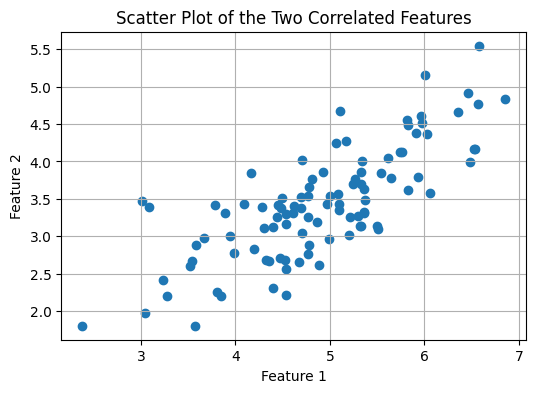

In [4]:
plt.figure(figsize=(6, 4))
plt.scatter(X[0], X[1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of the Two Correlated Features")
plt.grid(True)



<Axes: >

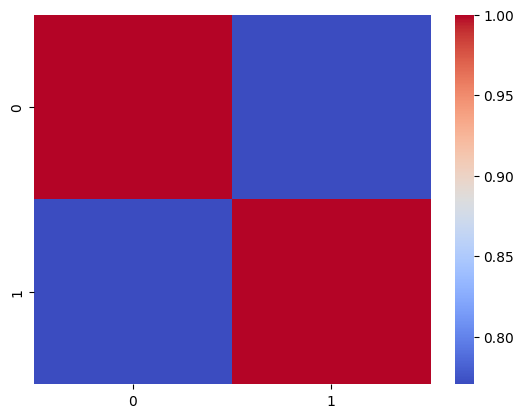

In [7]:
import seaborn as sns
import pandas as pd

sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

☝️ You can identify the positive correlation between the features  

Our observations are packed along a single line, it is not easy to spot differences between them

💡 PCA will help us find the directions (the so-called "principal components") that cancel out this correlation.

## (2) Principal Components

👉 Import `PCA` from `sklearn` and instantiate a model with `n_components=2`

❓Fit it on your `X`, and assign it to `pca`

In [21]:
from sklearn.decomposition import PCA

# Instantiate PCA model with 2 components
pca = PCA(n_components=2)

# Fit the model on your data
pca.fit(X)  



PCA(n_components=2)

Let's focus on two objects in that `PCA`: 

* `pca.components_`: it's a set of eigenvectors which point to the directions where the variance is maximally explained: the **directions of maximum variance**.

* `pca.explained_variance_`:  $Var(Principal  Component)$, given by the corresponding L2 norm of these eigenvectors.

    * `pca.explained_variance_ratio_`:  $ = \frac{Var(Principal\; Component)}{\sum Var(Principal\; Component)}$

In [22]:
# Vector coordinates of each Principal Component
pca.components_

array([[ 0.79286897,  0.60939216],
       [-0.60939216,  0.79286897]])

In [24]:
# Explained Variance for each Principal Component
# Ranked by decreasing order of importance
pca.explained_variance_

array([1.2231014 , 0.15046893])

In [25]:
# Explained Variance Ratio for each Principal Component
# Ranked by decreasing order of importance

# It is exactly the explained variance for each component...
# ... divided by the sum of explained variances !
pca.explained_variance_ratio_

array([0.89045415, 0.10954585])

👇 Run the cell below to visualize your two Principal Components

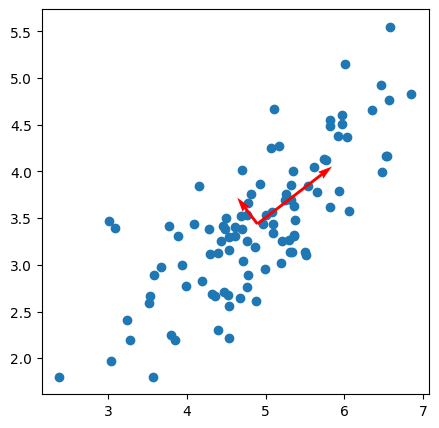

In [26]:
plt.figure(figsize=(5,5))

plt.scatter(X[0], X[1])

for (length, vector) in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length) # Square root of their lenghts to compare same "units"
    plt.quiver(*X.mean(axis=0), *v, units='xy', scale=1, color='r')

💡 The length of the vector is a measure of the standard deviation of the dataset when projected onto this axis!

💡 We can then use those directions (these "principal components") to "explain" most of our observations behavior - most of the distinction between observations happens along these axis. 

## (3) Apply PCA

We can use these components to project every sample of our dataset onto the directions of maximum variance.

❓ ***Questions*** ❓

1. Use the `transform` method of your `pca` on `X` and store the result in `X_transformed`  
2. Plot your projected features in `X_transformed`against one another.  
3.  Compute the correlation between your transformed features in `X_transformed`

In [30]:
X_transformed = pca.transform(X)
X_transformed[:5]


array([[ 0.29429576, -0.6026049 ],
       [-0.17693564, -0.17372885],
       [ 0.80523463, -0.18557755],
       [ 1.73263692, -0.41536853],
       [-0.21484109, -0.06569493]])

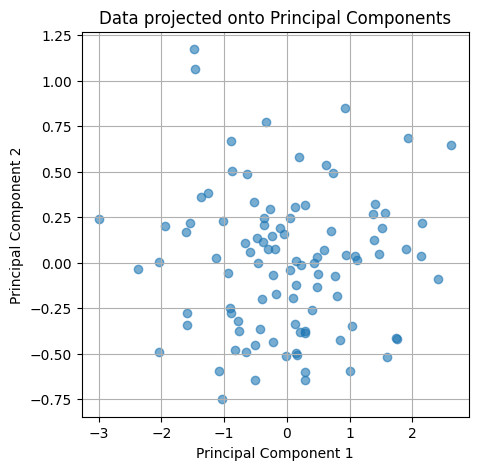

In [31]:
plt.figure(figsize=(5,5))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data projected onto Principal Components")
plt.grid(True)
plt.show()


☝️ There is no correlation at all between your transformed features.  

This makes it easier to study the behaviour between observations since they are no longer packed along a single line.

🏁 **Don't forget to push your notebook.**  

Proceed with the challenges of the day and come back here if you have time 😉

## (Optional) With a little help from Scaling

Remember that the `projections` obtained with the `PCA` is nothing more than the dot product of your initial `X` and your *transposed* components (when we say components, we mean the eigenvectors you produced when you do `pca.components_`)

👉 Compute your projected values manually by performing the dot product: $X.PC^T$.  

❓ Use `np.allclose`, to check that your `X_transformed` is equal to your dot product $X.PC^T$.

In [33]:
X_manual = np.dot(X, PC.T)
X_manual[:5]

NameError: name 'PC' is not defined

It's not equal 😱  

When the `PCA` of `sklearn` applies the reduction, it does so on a `X` that is, *centered*, but not *scaled*.

This means that `PCA().transform(X)` is actually equivalent to `np.dot(X - X.mean(axis=0), PC)`

In [32]:
np.allclose(X_transformed, np.dot(X - X.mean(axis=0), PC))

NameError: name 'PC' is not defined

That is why when using a `PCA` we often recommend to scale, more precisely standardize, your data first so that they are already centered.

This way, using `PCA.transform()` or performing the dot product with the principal components will be equivalent.